<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/Problema30_piezas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema 30**
El tiempo entre llegadas de piezas a una estación de ensamblado sigue una distribución exponencial con media $2$ minutos. La duración de la tarea llevada a cabo por el operario en dicha estación adopta una distribución exponencial con media $1$ minuto por pieza. Determine el tiempo medio de permanencia de las piezas en dicho proceso.

# **Resolución**
## **1. Identifique las variables.**

Tenemos dos: 

1.   $t_1:=$ Tiempo entre llegadas de piezas a la estación de ensamblado.
2.   $t_2:=$ Tiempo que tarda el operario en concluir su trabajo para una pieza.

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema, se sigue que las dos variables poseen una distribución exponencial $\,\mathrm{Exp}(\lambda_1)\,$ y $\,\mathrm{Exp}(\lambda_2)$ respectivamente.

**Nota:** Unidades de $\,\lambda_i\,$ piezas por minuto.

## **3. Modele las variables aleatorias.**

Habiendo deducido la distribución de cada variable aleatoria, se sigue que

  \begin{align*}
  t_1 &\sim \mathrm{Exp}(0.5) \\
  t_2 &\sim \mathrm{Exp}(1)
  \end{align*}

## **4. Defina el modelo del sistema y los objetivos de la simulación.**

Cada pieza $\,i\,$ arribará al sistema en el tiempo $\,\sum_{i=1}^n {t_1}_i$, con $\,n\,$ número total de piezas en el sistema que arribaron en el lapso estudiado.

Se seguirá un criterio de priorización FCFS ("*First Come, First Served*") o FIFO ("*First In, First Out*"); lo que significa que la primera pieza que entre al sistema será la primera atendida por el operario para su ensamble y así sucesivamente con las siguientes piezas.

Por lo tanto, cada pieza $\,i\,$ será atendida por el operario durante un tiempo $\,{t_2}_i$; sin embargo, el tiempo que tardarán en ser atendidas por el operario (tiempo de permanencia en el sistema) depende de cada tiempo $\,{t_2}_i\,$ y de lo largo que se vaya volviendo la cola de las piezas que siguen en espera; es decir, si una pieza llega cuando el operario sigue ensamblando una, entonces el tiempo de permanencia en el sistema de la pieza recién llegada será igual a $\,{t_2}_i\,$ más la diferencia de $\,{t_2}_i\,$ menos el tiempo de llegada de la nueva pieza. 

### **Objetivo:**

Con el modelo descrito anteriormente, calcularemos el tiempo de permanencia en el sistema para $\,n\,$ piezas e iremos calculando acumulativamente el tiempo de permanencia promedio.

Por lo tanto, implementamos el siguiente código:

In [ ]:
import random
import numpy as np
from math import log
from scipy.stats import norm
import matplotlib.pyplot as plt

In [133]:
def observacion():                   # Función que nos da el tiempo en minutos que tardó en llegar una pieza al sistema después de la
                                     #anterior (lapso entre piezas) y el tiempo que el operario tardó en ensamblarla.
  t1 = - 2 * log(random.random())     # Fórmula para v.a. distribuidas exponencialmente a partir de v.a. uniformemente distribuidas:
  t2 = - log(random.random())         #     x = - (1/lambda) * ln(u),       con  x ~ Exp(lambda)  y  u ~ U(0,1)
  return t1,t2

In [134]:
observacion()

(4.131343963186314, 0.24968114469790567)

## **5. Diseñe el experimento.**

In [153]:
def experimento(n):                      # Función que calcula el tiempo de permanencia acumulada en el sistema de cada pieza. Al
  t1,t2 = [],[]                          #final retorna una lista con la evolución del tiempo de permanencia promedio conforme se van
  for i in range(n):                     #observando más piezas.
    obs1,obs2 = observacion()
    t1.append(obs1)                       # Lista con los tiempos de llegada de cada pieza con respecto a la anterior.
    t2.append(obs2)                       # Lista con los tiempos que el operario tardó en ensamblar cada pieza.
  evol_prom = []
  sum_perma,acum = 0,0
  for i in range(n-1):
    sum_perma += t2[i] + acum             # Suma acumulada "sum_perma" de los tiempos de permanencia de cada pieza.
    evol_prom.append(sum_perma/(i+1))     # Promedio del tiempo de permanencia de cada pieza conforme se observan más piezas.
    if t2[i] + acum <= t1[i+1]:           # Condición que analiza el tiempo extra "acum" que se necesita para sacar una pieza del
      acum = 0                            #sistema gracias a un retraso por parte del operario.
    else:
      acum += t2[i] - t1[i+1]
  sum_perma += t2[i] + acum               # Suma del tiempo de permanencia de la última pieza.
  evol_prom.append(sum_perma/(i+1))       # Tiempo de permanencia promedio en el sistema tomando en cuenta todas las piezas.
  return evol_prom                        # Lista "evol_prom" con la evolución del tiempo de permanencia promedio.

In [154]:
evol_prom = experimento(200000)    # Realizamos un experimento con número de piezas grande y arbitrario.

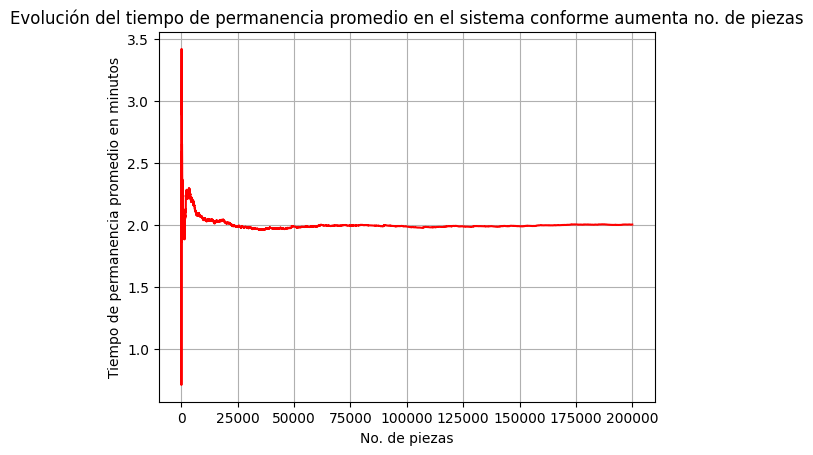

In [155]:
plt.plot(evol_prom, 'r')   
plt.xlabel('No. de piezas')    
plt.ylabel('Tiempo de permanencia promedio en minutos')
plt.grid(True)
plt.title('Evolución del tiempo de permanencia promedio en el sistema conforme aumenta no. de piezas')
plt.show()

In [156]:
n = 75000    # Definiendo número de piezas "n" para cada experimento a simular.

In [157]:
print('mu =', np.mean(evol_prom), ', sigma =', np.std(evol_prom))

mu = 2.000322326009784 , sigma = 0.04941884220809481


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align*}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align*}

Implementamos el siguiente código:

In [158]:
epsilon = 0.01    # Establecer la cota superior epsilon para el error de la probabilidad estimada.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [160]:
N = int(np.ceil((2*np.std(evol_prom)*norm.ppf(1-alpha/2)/epsilon)**2))  # Cálculo del no. necesario de simulaciones del experimento
print(N)

376


In [161]:
def simulacion(N):                     # Función que devuelve una lista con los tiempos de permanencia promedio estimados en los N
  prom = []                            #experimentos realizados.
  for i in range(N):
    evol_prom = experimento(n)
    prom.append(np.mean(evol_prom))
  return prom

In [162]:
prom = simulacion(N)    # Realizamos la simulación.

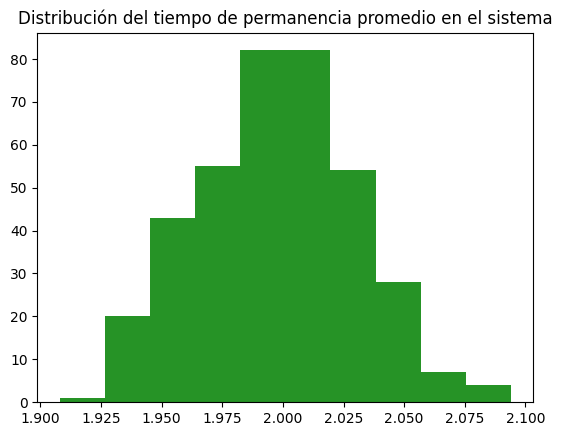

In [163]:
plt.hist(prom, color = 'g', alpha = 0.85)         # La gráfica nos sugiere que la distribución es aparentemente normal.
plt.grid(False)
plt.title('Distribución del tiempo de permanencia promedio en el sistema')
plt.show()

In [164]:
print('mu =', np.mean(prom), ', sigma =', np.std(prom))

mu = 1.9978776935582898 , sigma = 0.03236640023156324


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align*}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align*}

Implementamos el siguiente código:

In [165]:
mu = np.mean(prom)                                         # Se presenta el intervalos de confianza para la media estimada, de la
li = mu - norm.ppf(1-alpha/2) * np.std(prom)/np.sqrt(n)    #forma: 
ls = mu + norm.ppf(1-alpha/2) * np.std(prom)/np.sqrt(n)    #
print(li, '<', mu, '<', ls)                                #        Límite inferior < Media estimada < Límite superior

1.9976460544632997 < 1.9978776935582898 < 1.99810933265328


## **8. Comparamos con la solución analítica.**

Al estarse trabajando un problema de líneas de espera con sólo una fila de clientes, un solo servidor y criterio de prioridad FIFO; la fórmula ya conocida para calcular el tiempo de permanencia promedio $\,W\,$ en el sistema de un solo cliente es 

$$W = \frac{1}{\mu - \lambda}$$

donde $\,\lambda\,$ es el número promedio de llegadas de clientes por periodo y $\,\mu\,$ es el número medio de clientes que completan el servicio en cada periodo.

Por lo planteado anteriormente a lo largo de la resolución del problema, se deduce fácilmente que

  \begin{align*}
  \lambda &= \lambda_1 = 0.5\;\,\text{piezas/minuto} \\
  \mu &= \lambda_2 = 1\;\,\text{pieza/minuto}
  \end{align*}

Por lo tanto, el tiempo de permanencia promedio $\,W\,$ en el sistema es de

$$W = \frac{1}{1 - 0.5} = \frac{1}{0.5} = 2\;\,\text{minutos}$$

In [166]:
mu_ana = 2     # Solución analítica del problema.
print(mu_ana)    

2


# **Solución**

In [171]:
print('El tiempo de permanencia promedio en el sistema, estimado mediante simulación, para una sola pieza es')
print('de ' + str(mu) + ' minutos.\n')
print('El cual difiere en un ' + str(abs(mu - mu_ana)*100 / mu_ana) + '% de la solución analítica.')

El tiempo de permanencia promedio en el sistema, estimado mediante simulación, para una sola pieza es
de 1.9978776935582898 minutos.

El cual difiere en un 0.10611532208550933% de la solución analítica.
